Total Revenue: $689995.56


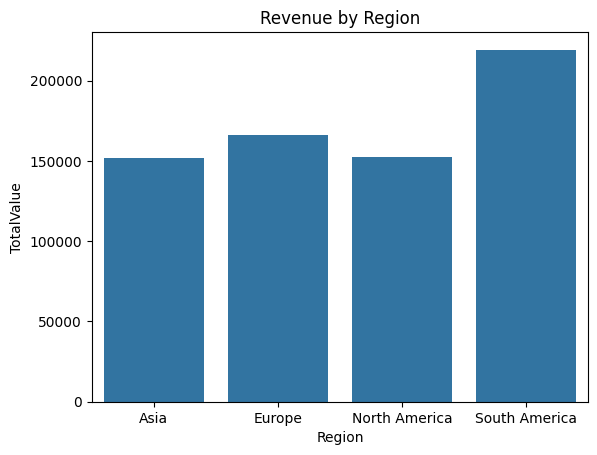

Top 10 Products by Revenue:
ProductName
ActiveWear Smartwatch      39096.97
SoundWave Headphones       25211.64
SoundWave Novel            24507.90
ActiveWear Jacket          22712.56
ActiveWear Rug             22314.43
TechPro Headphones         19513.80
BookWorld Cookbook         19221.99
BookWorld Sweater          18743.79
TechPro Textbook           18267.96
ActiveWear Cookware Set    18083.73
Name: TotalValue, dtype: float64
Top 10 Customers by Lifetime Value:
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


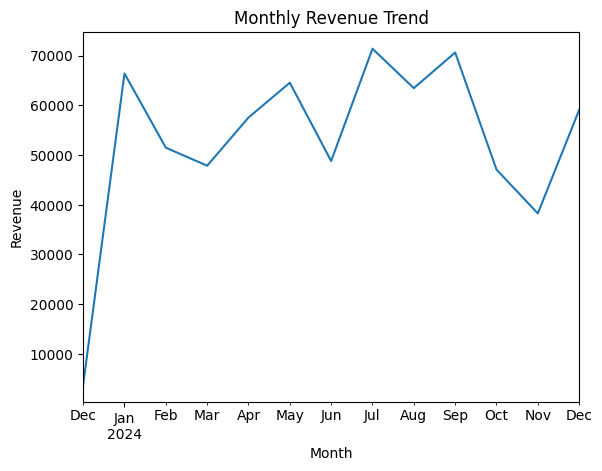

In [2]:

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv("/Users/kartikaursang/Downloads/Customers.csv")
products = pd.read_csv("/Users/kartikaursang/Downloads/Products.csv")
transactions = pd.read_csv("/Users/kartikaursang/Downloads/Transactions.csv")

# Merge datasets
merged = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

# 1. Total Revenue
total_revenue = merged['TotalValue'].sum()
print(f"Total Revenue: ${total_revenue}")

# 2. Revenue by Region
revenue_by_region = merged.groupby('Region')['TotalValue'].sum().reset_index()
sns.barplot(x='Region', y='TotalValue', data=revenue_by_region)
plt.title("Revenue by Region")
plt.show()

# 3. Top Products by Revenue
top_products = merged.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
print("Top 10 Products by Revenue:")
print(top_products)

# 4. Customer Lifetime Value (CLV)
clv = merged.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
print("Top 10 Customers by Lifetime Value:")
print(clv)

# 5. Monthly Revenue Trend
merged['TransactionDate'] = pd.to_datetime(merged['TransactionDate'])
revenue_trend = merged.groupby(merged['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
revenue_trend.plot(kind='line', title='Monthly Revenue Trend')
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()
